In [1]:
import numpy as np
import pandas as pd
from torch import nn
import torch

import matplotlib.pyplot as plt
print(torch.__version__)

/var/folders/t4/zmlw0bsn5fj10qfgn0sb9qr80000gn/T/ipykernel_9966/2637247673.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


2.2.0


# Pytorch Workflow

## 1. Data - Preparing and loading

In [2]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Splitting data into training and tes sets

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [6]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
   plt.figure(figsize=(10,7))
   plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")
   plt.scatter(test_data,test_label,c="g",s=4,label="Testing Data")

   if predictions is not None:
      plt.scatter(test_data, predictions,c="r",s=4,label="Predictions")
   
   plt.legend(prop={"size":14})

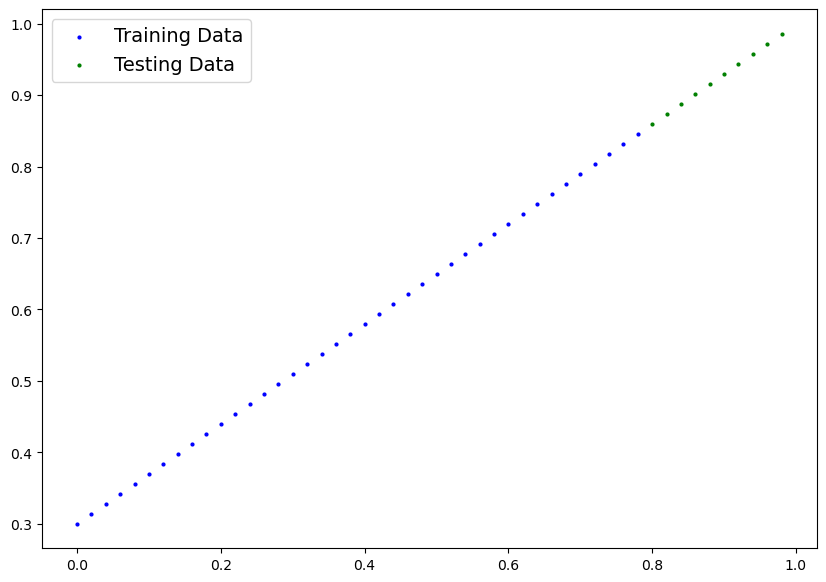

In [7]:
plot_predictions()

## 2. Building model

In [8]:
# Create linea regression model class
class LinearRegresssionModel(nn.Module): #<- Everything from pytorch inherits from torch.nn.module
   def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
      self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
   
   # Forward method to define the computation in the model
   def forward(self, x: torch.Tensor) -> torch.Tensor: #<- "x" is the input
      return self.weights * x + self.bias # this is the linear regressin formula

## Pytorch model building essentials

* torch.nn - contains all of the building for computational graphs
* torch.nn.Parameter - what parameters should our model try and learn
* torch.nn.Module - base class for all neural network moduele
* torch.optim - this is where the optimizers in pytorch live
* def.forward - All nn.Module requires this method to be defined

In [9]:
# Check what is inside the class
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegresssionModel()

# Check our parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

### Make predictions using `torch.inference_mode()`

To check the model prediction power, use method to predict `y_test` based on `X_test`

In [12]:
# Make prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

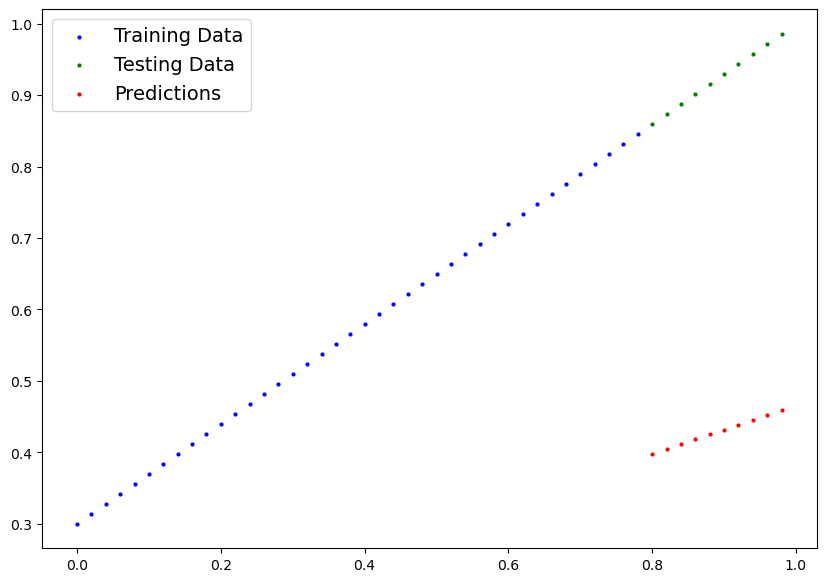

In [13]:
plot_predictions(predictions=y_preds)

## 3. Train the model

Fit the model on the test data using training loop

** Loss function is to measure model fit performance to the training data (smaller is better)

`loss function <=> cost function <=> Criterion (Similar, depends on situation)`


** Optimizer is a function to reduce the loss value to the best minimum

torch.optim.Optimizer(params, lr) - Take two parameters, params = model parameters to be tuned, lr = learning rate



Pytorch requires:
* Training Loop
* Testing Loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer (SGD - Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate - hyperparameter for optimizer step changes propo

### Building the training loop

Training loop structure
0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backwards - move backwards through the model to calculate the gradient (**backpropagation**)
5. Optimizer step - adjust model parameter to improve the loss (**gradient descent**)

In [16]:
torch.manual_seed(42)

# epoch is one loop through the data (Hyperparameter = a parameter set by the user)
epochs = 100

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # Sets all parameters that requires gradients to gradients

    # 1. Forward pass
    y_preds = model_0(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_preds, y_train)
    if (loss > 0.03) & (epoch % 5 == 0):
        print(f"Loss: {loss}")
    else:
        print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # By defaul the optimzer accumulates, step 3 ensure it is reset to zero

    model_0.eval() # Turns off different settings for model not needed for evaluation/testing

    # Print model stat

print(f"Model State: {model_0.state_dict()}")

Loss: 0.31288138031959534
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006634056568146
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681282937526703
Loss: 0.08908725529909134
Loss: 0.08227583020925522
Loss: 0.07638873159885406
Loss: 0.07160007208585739
Loss: 0.06747636198997498
Loss: 0.06395438313484192
Loss: 0.06097004562616348
Loss: 0.05845819041132927
Loss: 0.05635259300470352
Loss: 0.0545857734978199
Loss: 0.053148526698350906
Loss: 0.05181945487856865
Loss: 0.05069301277399063
Loss: 0.049822848290205
Loss: 0.04895269125699997
Loss: 0.04819351062178612
Loss: 0.047531817108392715
Loss: 0.04692792519927025
Loss: 0.0464233160018

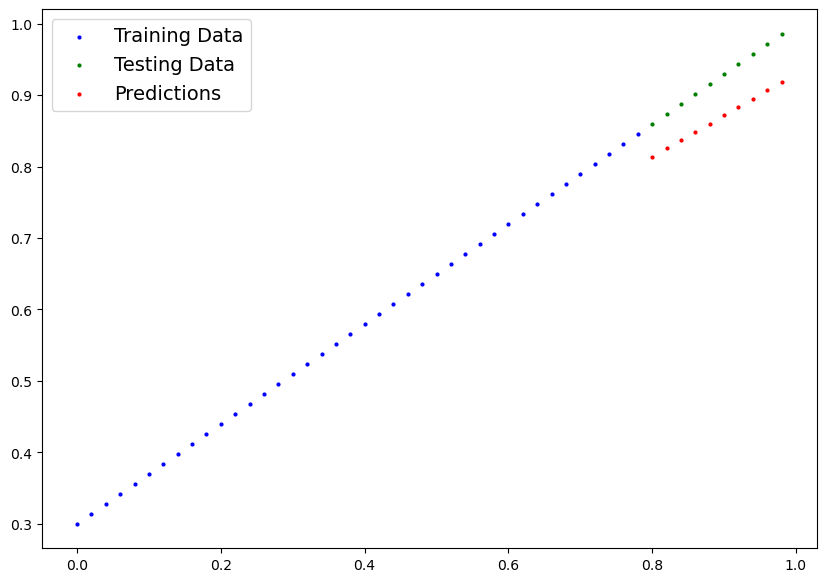

In [17]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)